In [ ]:
# Solo en google colab
#Cambia el entorno de ejecución a TPU

In [18]:
# Solo en google colab
# Instalar tensorflow_addons
!pip install tensorflow_addons

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as plt
import seaborn as sns
sns.set(style="darkgrid")

## Tensorflow

¿Cuál es valor de $w$ que minimiza el valor de la siguiente función siendo $x = [100, -5, 2]$?

$$x_0 + x_1w + x_2w^2$$

#### Solución
$w=5/4$

### Definición del modelo

In [ ]:
# Coeficientes a optimizar
w = tf.Variable(0, name='w', dtype=tf.float32)
# Función a optimizar/minimizar
f = lambda: w**2. -20.*w + 100.

# Optimizador de tipo descenso de gradiente estocástico
optimizer = #TODO

# Iteramos 20 veces el optimizador
for i in range(20):
    optimizer.minimize(#TODO
    print("iterations: ", i, ",\f: ", f().numpy(), ",\tw: ", w.numpy())

## Perceptrón simple: Compuertas AND, OR y XOR

In [ ]:
# Entradas a la compuerta
X = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=np.float32)

y_and = np.array([[0.],[0.],[0.],[1.]], dtype=np.float32)

y_or = np.array([[0.],[1.],[1.],[1.]], dtype=np.float32)

y_xor = np.array([[0.],[1.],[1.],[0.]], dtype=np.float32)

#### Primero intentemos obtener los pesos manualmente. Define los pesos y el bías como constantes.

In [ ]:
# Definimos los pesos y bias
W = tf.constant(#TODO
b = tf.constant(#TODO

# Perceptrón simple (con función de activación sigmoide)
y_ = #TODO

# Resultado
print("Output", np.round(y_.numpy()).reshape(4,))

#### Probemos ahora optimizando con tensorflow

In [ ]:
# Definimos los pesos, ahora son variables porque tenemos que optimizarlos
W = tf.Variable(#TODO
b = tf.Variable(#TODO

#Definimos las métricas
cost = tf.metrics.Mean(name='cost')
accuracy = tf.metrics.BinaryAccuracy(name='accuracy')

#Definimos el optimizador (SGD)
optimizer = #TODO

@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        # Se registran las funciones a optimizar
        y_ = #TODO
        # Usar binary_crossentropy
        loss = #TODO
    #Obtenemos los gradientes
    gradients = tape.gradient(#TODO
    #Optimizamos (1 paso)
    optimizer.apply_gradients(#TODO

    #Calculamos las métricas
    cost(#TODO
    accuracy(#TODO

Probemos el funcionamiento de nuetro perceptron simple con las tres compuertas
#### AND

In [ ]:
EPOCHS = 20

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_and)

    template = 'Epoch {}, Cost: {}, Accuracy: {}'
    print(template.format(epoch+1,
                        cost.result(),
                        accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(X, W, name='matmul') + b, name="sigmoid")
print("Output", np.round(y_.numpy()).reshape(4,))

#### OR
Ejecutar primero el bloque donde se definen los pesos para reinicializar los valores

In [ ]:
EPOCHS = 20

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_or)

    template = 'Epoch {}, Cost: {}, Accuracy: {}'
    print(template.format(epoch+1,
                        cost.result(),
                        accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(X, W, name='matmul') + b, name="sigmoid")
print("Output", np.round(y_.numpy()).reshape(4,))

#### XOR
Ejecutar primero el bloque donde se definen los pesos para reinicializar los valores

In [ ]:
EPOCHS = 20

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_xor)

    template = 'Epoch {}, Cost: {}, Accuracy: {}'
    print(template.format(epoch+1,
                        cost.result(),
                        accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(X, W, name='matmul') + b, name="sigmoid")
print("Output", np.round(y_.numpy()).reshape(4,))

#### ¿Qué ha sucedido con la compuerta XOR?

## Perceptrón Multicapa: Compuerta XOR
Crear un perceptron multicapa con topología 2-2-1 (2 entradas, 2 ocultas y una salida)

In [ ]:
# Pesos del perceptrón multicapa
Wh = #TODO
bh = #TODO

Wo = #TODO
bo = #TODO

#Definimos las métricas
cost = #TODO
accuracy = #TODO

#Definimos el optimizador (SGD)
optimizer = #TODO

@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        # Se registran las funciones a optimizar
        # Perceptrón multicapa
        #Capa oculta
        a_h = #TODO
        #Capa de salida
        y_ = #TODO
        # Usar binary_crossentropy
        loss = #TODO
    #Obtenemos los gradientes
    gradients = #TODO
    #Optimizamos (1 paso)
    optimizer.#TODO

    #Calculamos las métricas
    cost(#TODO
    accuracy(#TODO

Ejecuta varias veces junto al anterior, no encuentra siempre la solución

In [ ]:
EPOCHS = 100

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_xor)
    if epoch%10==0:
        template = 'Epoch {}, Cost: {}, Accuracy: {}'
        print(template.format(epoch+1,
                            cost.result(),
                            accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(tf.nn.tanh(tf.matmul(X, Wh) + bh, name='a_h'), Wo) + bo, name='y_')
print("Output", np.round(y_.numpy()).reshape(4,))

## Problema regresión: Diabetes

In [ ]:
import io
import requests

# https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# age, sex, body mass index, average blood pressure, and six blood serum measurements
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
c=requests.get(url).content
diabetes=pd.read_csv(io.StringIO(c.decode('utf-8')), sep='\t')

In [ ]:
diabetes.head()

In [ ]:
from sklearn.model_selection import train_test_split

diabetes['SEX'] -= 1
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Y', axis=1).values,
                                                    #Aniadimos una dimension para que sea un vector columna
                                                    diabetes['Y'].values[..., np.newaxis],
                                                    test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

class StandardScalerSelection(StandardScaler):
    '''Solo funciona con pandas '''

    def __init__(self, copy=True, with_mean=True, with_std=True, skip_cols=None):
        self.skip_cols = np.array(skip_cols).flatten().tolist()
        super().__init__(copy, with_mean, with_std)

    def fit(self, X, y=None):
        return super().fit(np.delete(X, self.skip_cols, axis=1))

    def transform(self, X):
        X_scl = super().transform(np.delete(X, self.skip_cols, axis=1))
        # Restar uno por cada indice anterior para que asi se inserte en su posición
        idx = np.array(skip_cols)-np.arange(len(skip_cols))
        return np.insert(X_scl, idx, X[:,self.skip_cols], axis=1)

In [ ]:
skip_cols = sorted([diabetes.columns.get_loc(c) for c in ['SEX'] if c in diabetes])
scaler = StandardScalerSelection(skip_cols=skip_cols)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

### TensorFlow

In [ ]:
#TODO
# Pesos del perceptrón multicapa
Wh1 = #TODO
bh1 = #TODO

Wh2 = #TODO
bh2 = #TODO

Wo = #TODO
bo = #TODO

#Definimos las funciones de coste
train_cost = #TODO
train_r2 = #TODO
test_cost = #TODO
test_r2 = #TODO


#Definimos el optimizador (Adam)
optimizer = #TODO

@tf.function
def train_step(X, y):
    #TODO

# Función para obtener la precision y coste en test
@tf.function
def test(X, y):
    # Perceptrón multicapa
    #TODO
    # Funcion de perdida
    #TODO
    #Calculamos las métricas
    #TODO

In [ ]:
EPOCHS = 100

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_cost.reset_states()
    train_r2.reset_states()
    test_cost.reset_states()
    test_r2.reset_states()

    train_step(X_train, y_train)
    test(X_test, y_test)
    if epoch%10==0:
        template = 'Epoch {:}, Train cost: {:.4f}, Train R2: {:.4f}, Test cost: {:.4f}, Test R2: {:.4f}'
        print(template.format(epoch+1,
                            train_cost.result(),
                            train_r2.result(),
                            train_cost.result(),
                            test_r2.result()))

## Keras

In [ ]:
#Modelo
model = keras.Sequential([
    #TODO
  ])

model.compile(#TODO

                )

model.summary()

In [ ]:
# Entrenar el modelo
history = model.fit(#TODO

In [ ]:
# Obtener la precisión del modelo
# TODO

In [ ]:
hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Error',
               value_vars=['mean_absolute_error','val_mean_absolute_error'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Error', hue='Type', data=df)


print("Mean Absolute Error Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Mean Absolute Error Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

### Problema de clasificación: Breast Cancer

In [ ]:
import io
import requests

# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
c=requests.get(url).content
cancer=pd.read_csv(io.StringIO(c.decode('utf-8')), header=None, index_col=0)

In [ ]:
cancer.head()

In [ ]:
from sklearn.model_selection import train_test_split

cancer[1] = list(map(float, cancer[1].values=='M'))
X_train, X_test, y_train, y_test = train_test_split(cancer.drop(1, axis=1).values,
                                                    #Aniadimos una dimension para que sea un vector columna
                                                    cancer[1].values[..., np.newaxis],
                                                    test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### TensorFlow
Utilizar en este caso la métrica `AUC`

Para la función de perdida, utilizar `binary_crossentropy` al ser un problema binario

In [ ]:
#TODO
# Pesos del perceptrón multicapa
#TODO

#Definimos las métricas
train_cost = #TODO
train_auc = #TODO
test_cost = #TODO
test_auc = #TODO


#TODO...


In [ ]:
EPOCHS = 100

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_cost.reset_states()
    train_auc.reset_states()
    test_cost.reset_states()
    test_auc.reset_states()

    train_step(X_train, y_train)
    test(X_test, y_test)
    if epoch%10==0:
        template = 'Epoch {:}, Train Cost: {:.4f}, Train AUC: {:.2f}, Test Cost: {:.4f}, Test AUC: {:.2f}'
        print(template.format(epoch+1,
                            train_cost.result(),
                            train_auc.result()*100,
                            test_cost.result(),
                            test_auc.result()*100))

### Keras

In [ ]:
#TODO

In [ ]:
hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['binary_accuracy','val_binary_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

## Problema de clasificación multiclase: MNIST

In [20]:
# Cargo el data set que contiene imágenes con números entre el 0 y 9 (borrosas) y quiero una red neuronal que me clasifique cada imagen
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [21]:
# divido entre esa cantidad para obtener números entre 0 y 1
X_train = train_images / 255.0
X_test = test_images / 255.0

In [22]:
train_labels # Las etiquetas de los números que estoy metiendo

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
# OneHotEncoding para AUC
from sklearn.preprocessing import LabelBinarizer

le = LabelBinarizer().fit(train_labels)
y_train_label = le.transform(train_labels)
y_test_label = le.transform(test_labels)
y_train_label

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [24]:
y_train = train_labels[..., np.newaxis]
y_test = test_labels[..., np.newaxis]

### Tensorflow

`sparse_categorical_crossentropy` funciona mejor en problemas donde las clases son mutuamente excluyentes, es decir, solo hay una clase positiva en cada tupla. `categorical_crossentropy` permite trabajar con problemas donde más de una clase puede ser positiva.

In [ ]:
#TODO

In [25]:
X_train.shape #tengo 60.000 imágenes de 28 píxeles

(60000, 28, 28)

In [26]:
# Vamos a construir una red neuronal con capa oculta de 64 neuronas y capa de salida de 10 neuronas
# (xq tengo 10 clases y quiero que cada neuronas me devuelvo la probabilidad de pertenencia a cada clase)

numpix = X_train.shape[1] * X_train.shape[2] #nº total de píxeles. En este caso, 28*28 = 784

Wh = tf.Variable(tf.random.truncated_normal(shape=[numpix,64], stddev=1./np.sqrt(numpix), dtype=tf.float64), name='Wh')
# Defino los pesos y les doy valores aleatorios, así como la primera capa junto a la desviación estándar
bh = tf.Variable(tf.zeros([64], dtype=tf.float64), name='bh')
# Defino los 64 bias (uno por cada neurona, para la capa oculta) y los inicializo a 0

Wo = tf.Variable(tf.random.truncated_normal(shape=[64,10], stddev=1./np.sqrt(64), dtype=tf.float64), name='Wo')
bo = tf.Variable(tf.zeros([10], dtype=tf.float64), name='bo')
# Lo mismo para la capa de salida. Tendré 10 neuronas, cada una recibe 64 entradas y devuelve una salida

# Defino las métricas a usar tanto para el conjuntonde entrenamiento como de test (media y AUC por ej)
train_cost = tf.metrics.Mean(name = 'cost')
train_auc = tf.metrics.AUC(name = 'auc')
test_cost = tf.metrics.Mean(name = 'cost')
test_auc = tf.metrics.AUC(name = 'auc')


In [27]:
from tensorflow.python.eager.backprop import GradientTape
optimizer = tf.optimizers.Adam(learning_rate=0.3)

# Creo una función que se encargue de hacer cada iteración / Epoch
@tf.function
def train_step(X, y, y_label):
  with tf.GradientTape() as tape:
    X = tf.keras.layers.Flatten(dtype='float64')(X)  # Tengo un vector de matrices, con lo que no puedo operar, por lo que aplano cada matriz para pasarla a un "vector"
    a_h = tf.nn.tanh(tf.matmul(X, Wh) + bh, name='a_h') # F de activación tan hiberbólica para la capa oculta
    y_ = tf.nn.softmax(tf.matmul(a_h, Wo) + bo, name='y_') # F de activación Softmax para capa de salida por ser problema de clasificación multiclase
    loss = tf.losses.sparse_categorical_crossentropy(y, y_) # Cálculo de la función de pérdida
  gradients = tape.gradient(loss, (Wh, bh, Wo, bo))
  optimizer.apply_gradients(zip(gradients, (Wh, bh, Wo, bo)))
  train_cost(loss) # A la función de coste le paso la función de pérdida, que en nuestro caso es la media
  train_auc(y_label, y_)

@tf.function
def test(X, y, y_label):
  X = tf.keras.layers.Flatten(dtype='float64')(X)
  a_h = tf.nn.tanh(tf.matmul(X, Wh) + bh, name='a_h')
  y_ = tf.nn.softmax(tf.matmul(a_h, Wo) + bo, name='y_')
  loss = tf.losses.sparse_categorical_crossentropy(y, y_)
  train_cost(loss)
  train_auc(y_label, y_)



In [28]:
# Ahora, en cada epoch va a llamar a entrenar, calcula el test como lo estaba haciendo e imprime valores
EPOCHS = 15

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_cost.reset_states()
    train_auc.reset_states()
    test_cost.reset_states()
    test_auc.reset_states()

    train_step(X_train, y_train, y_train_label)
    test(X_test, y_test, y_test_label)
    if epoch%1==0:
        template = 'Epoch {:}, Train Cost: {:.4f}, Train AUC: {:.2f}, Test Cost: {:.4f}, Test AUC: {:.2f}'
        print(template.format(epoch+1,
                            train_cost.result(),
                            train_auc.result()*100,
                            test_cost.result(),
                            test_auc.result()*100))

Epoch 1, Train Cost: 2.3319, Train AUC: 57.69, Test Cost: 0.0000, Test AUC: 0.00
Epoch 2, Train Cost: 2.9776, Train AUC: 75.54, Test Cost: 0.0000, Test AUC: 0.00
Epoch 3, Train Cost: 5.4591, Train AUC: 73.32, Test Cost: 0.0000, Test AUC: 0.00
Epoch 4, Train Cost: 5.8851, Train AUC: 74.92, Test Cost: 0.0000, Test AUC: 0.00
Epoch 5, Train Cost: 3.7121, Train AUC: 79.68, Test Cost: 0.0000, Test AUC: 0.00
Epoch 6, Train Cost: 2.6600, Train AUC: 84.94, Test Cost: 0.0000, Test AUC: 0.00
Epoch 7, Train Cost: 2.2563, Train AUC: 88.16, Test Cost: 0.0000, Test AUC: 0.00
Epoch 8, Train Cost: 1.7462, Train AUC: 91.53, Test Cost: 0.0000, Test AUC: 0.00
Epoch 9, Train Cost: 1.5754, Train AUC: 92.89, Test Cost: 0.0000, Test AUC: 0.00
Epoch 10, Train Cost: 1.6391, Train AUC: 92.61, Test Cost: 0.0000, Test AUC: 0.00
Epoch 11, Train Cost: 1.4246, Train AUC: 93.61, Test Cost: 0.0000, Test AUC: 0.00
Epoch 12, Train Cost: 1.4021, Train AUC: 93.64, Test Cost: 0.0000, Test AUC: 0.00
Epoch 13, Train Cost: 1.2

### Keras
Probar a crear el modelo con y sin dropout y batch normalization para comparar los resultados de validación

In [30]:
#TODO
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
 ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3502 - accuracy: 0.8892 - val_loss: 0.1543 - val_accuracy: 0.9542
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2324 - accuracy: 0.9281 - val_loss: 0.1464 - val_accuracy: 0.9563
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2025 - accuracy: 0.9370 - val_loss: 0.1137 - val_accuracy: 0.9654
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1843 - accuracy: 0.9429 - val_loss: 0.1136 - val_accuracy: 0.9643
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1724 - accuracy: 0.9474 - val_loss: 0.1155 - val_accuracy: 0.9650


Accuracy Train: 0.97
Accuracy Test: 0.96


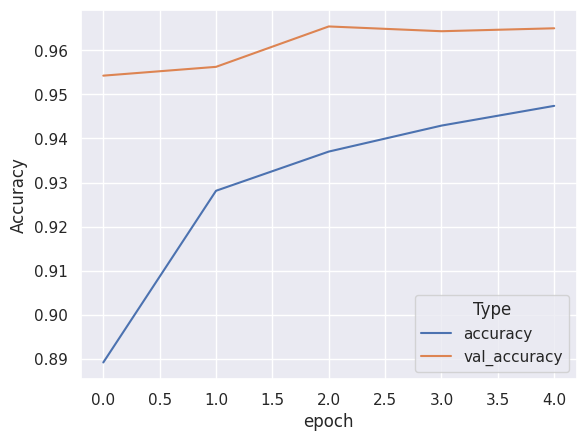

In [33]:
hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['accuracy','val_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])